In [1]:
import os
import itertools
data_dir = 'data/'
model_sir = 'models/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from source.utils import read_data, preprocess, train, test, run_kfold_test
from source.models import BitterGCN_Baseline, BitterGCN_MixedPool, BitterGAT_Baseline, \
    BitterGAT_MixedPool, BitterGraphSAGE_Baseline, BitterGraphSAGE_MixedPool
        

In [4]:
df = read_data(data_dir)

In [5]:
# k Fold
nsplits = 10
graph_data = preprocess(df)
n=len(graph_data)
graph_data[0], graph_data[7]

(Data(x=[2, 20], edge_index=[2, 2], y=0),
 Data(x=[8, 20], edge_index=[2, 14], y=1))

In [6]:
acid_pop = np.unique([j for i in df[df.bitter=='Positive'].seq.apply(lambda x: list(x)).to_list() for j in i], return_counts=True)
pos_pop = dict(zip(acid_pop[0], acid_pop[1]))
pos_pop['C'] = 0
acid_pop = np.unique([j for i in df[df.bitter=='Negative'].seq.apply(lambda x: list(x)).to_list() for j in i], return_counts=True)
neg_pop = dict(zip(acid_pop[0], acid_pop[1]))
pops=pd.DataFrame([pos_pop, neg_pop], index=['Pos', 'Neg']).T.sort_index()

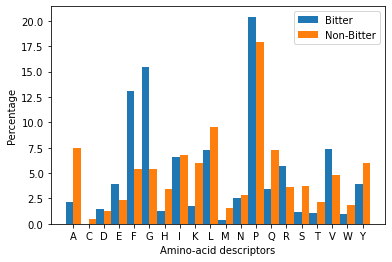

In [7]:
plt.bar(np.arange(20)-0.25, 100*pops['Pos']/pops['Pos'].sum(), width=0.5)
plt.bar(np.arange(20)+0.25, 100*pops['Neg']/pops['Neg'].sum(), width=0.5)
plt.xticks(np.arange(20), pops.index)
#plt.title('Population of animo-acids in bitter and non-bitter peptides in BT640 dataset')
plt.xlabel('Amino-acid descriptors')
plt.ylabel('Percentage')
plt.legend(['Bitter', 'Non-Bitter'])
plt.show()

In [8]:
met = ['ACC', 'ROC']
gnns = ['GCN', 'GAT', 'GraphSAGE']
pool = ['Baseline', 'MixedPool']

In [9]:
import itertools

In [10]:
res=pd.read_csv('kfold_res.tsv', sep='\t')
res

,ACC_GCN_Baseline,ROC_GCN_Baseline,ACC_GCN_MixedPool,ROC_GCN_MixedPool,ACC_GAT_Baseline,ROC_GAT_Baseline,ACC_GAT_MixedPool,ROC_GAT_MixedPool,ACC_GraphSAGE_Baseline,ROC_GraphSAGE_Baseline,ACC_GraphSAGE_MixedPool,ROC_GraphSAGE_MixedPool
0,0.81,0.81,0.86,0.86,0.78,0.81,0.80,0.85,0.77,0.86,0.75,0.86
1,0.91,0.97,0.95,0.98,0.81,0.91,0.83,0.97,0.89,0.91,0.89,0.94
2,0.84,0.89,0.91,0.91,0.83,0.85,0.84,0.90,0.81,0.92,0.86,0.90
3,0.84,0.91,0.89,0.91,0.88,0.90,0.89,0.89,0.77,0.88,0.83,0.91
4,0.80,0.83,0.77,0.85,0.81,0.85,0.78,0.84,0.84,0.88,0.83,0.85
5,0.84,0.92,0.86,0.90,0.84,0.92,0.88,0.93,0.84,0.91,0.84,0.89
6,0.81,0.92,0.88,0.92,0.78,0.93,0.86,0.93,0.84,0.93,0.81,0.93
7,0.89,0.90,0.81,0.87,0.88,0.91,0.80,0.91,0.84,0.90,0.80,0.91
8,0.80,0.86,0.88,0.89,0.81,0.87,0.80,0.89,0.80,0.82,0.83,0.87
9,0.78,0.77,0.77,0.80,0.70,0.83,0.78,0.85,0.72,0.82,0.81,0.83


In [11]:
accs = [i[0]+'_'+i[1] for i in list(itertools.product([i[0]+'_'+i[1] for i in list(itertools.product(['ACC'], gnns))],pool))]
accs=res[accs]
print('Average')
accs.T.mean(axis=1).round(2)

Average


ACC_GCN_Baseline           0.83
ACC_GCN_MixedPool          0.86
ACC_GAT_Baseline           0.81
ACC_GAT_MixedPool          0.83
ACC_GraphSAGE_Baseline     0.81
ACC_GraphSAGE_MixedPool    0.82
dtype: float64

In [12]:
rocs = [i[0]+'_'+i[1] for i in list(itertools.product([i[0]+'_'+i[1] for i in list(itertools.product(['ROC'], gnns))],pool))]
rocs=res[rocs]
rocs.T.mean(axis=1).round(2)

ROC_GCN_Baseline           0.88
ROC_GCN_MixedPool          0.89
ROC_GAT_Baseline           0.88
ROC_GAT_MixedPool          0.90
ROC_GraphSAGE_Baseline     0.88
ROC_GraphSAGE_MixedPool    0.89
dtype: float64

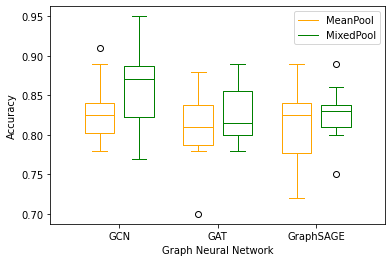

In [13]:
p1=plt.boxplot([accs['ACC_GCN_Baseline'], accs['ACC_GAT_Baseline'], accs['ACC_GraphSAGE_Baseline']], positions=[0.30,1.30,2.30])
for item in ['boxes', 'whiskers', 'medians', 'caps', 'fliers']:
    plt.setp(p1[item], color='orange')
p2=plt.boxplot([accs['ACC_GCN_MixedPool'], accs['ACC_GAT_MixedPool'], accs['ACC_GraphSAGE_MixedPool']], positions=[0.70,1.70,2.70])
for item in ['boxes', 'whiskers', 'medians', 'caps', 'fliers']:
    plt.setp(p2[item], color='green')
plt.xticks([0.5, 1.5, 2.5], ['GCN', 'GAT', 'GraphSAGE'])
plt.legend([p1["medians"][0], p2["medians"][0]], ['MeanPool', 'MixedPool'])
plt.xlabel('Graph Neural Network')
plt.ylabel('Accuracy')
plt.show()

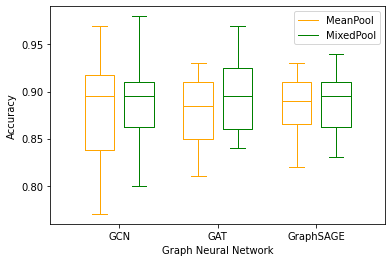

In [14]:
p1=plt.boxplot([rocs['ROC_GCN_Baseline'], rocs['ROC_GAT_Baseline'], rocs['ROC_GraphSAGE_Baseline']], positions=[0.30,1.30,2.30])
for item in ['boxes', 'whiskers', 'medians', 'caps', 'fliers']:
    plt.setp(p1[item], color='orange')
p2=plt.boxplot([rocs['ROC_GCN_MixedPool'], rocs['ROC_GAT_MixedPool'], rocs['ROC_GraphSAGE_MixedPool']], positions=[0.70,1.70,2.70])
for item in ['boxes', 'whiskers', 'medians', 'caps', 'fliers']:
    plt.setp(p2[item], color='green')
plt.xticks([0.5, 1.5, 2.5], ['GCN', 'GAT', 'GraphSAGE'])
plt.legend([p1["medians"][0], p2["medians"][0]], ['MeanPool', 'MixedPool'])
plt.xlabel('Graph Neural Network')
plt.ylabel('Accuracy')
plt.show()